# How children's gender and spatial skills relate to mathematical abilities

## Background

Developmental research shows that gender differences in spatial skills emerge with formal education, particularly around age 7, with boys having an advantage over girls (Lauer et al., 2019; Ganley & Vasilyeva, 2011). The reason for this divergence is up for debate, with some arguing that it is caused by how boys and girls are socialized -- boys may be more commonly encouraged to engage in spatial activities, such as playing with blocks and legos, than girls (Casey, 1996; Bian et al., 2017; Verdine et al., 2019). This gender difference is crucial to understand because spatial skills predict subsequent formal mathematical abilities such as symbolic calculation (Gunderson & Hildebrand, 2021).

One task that boys show better performance on than girls is the number line task, in which children are asked to place where they believe numbers are located on the number line (Hutchison et al., 2019). This task is intriguing because it seems to combine symbolic number and spatial thinking, and can be used with younger children who may have recently started developing their symbolic number skills. Gunderson & Hildebrand (2021) showed that this task is also predictive of children's future calculation abilities.
 
Children’s performance on number line and calculation tasks may be affected by a combination of gendered behavior and spatial skill influences. Thus, modeling this relationship will help us better understand what factors are important in children’s mathematical development – an important question to answer if we want to bolster children's mathematical abilities. Another potential contributor to children's mathematical abilities is their parents’ level of mathematical skill, which could influence what children are exposed to and taught about space and number in the home before, and during, formal education.
    
The data used in this project come from an ongoing study for children ages 4-8 and their parents. Information collected from parents includes measures of gendered behavior and spatial experience, and both children and their parents complete number line and calculation tasks. Additionally, measures of spatial working memory, verbal knowledge, and visual analogical reasoning are collected. These data will be used to test two hypotheses: 1) Children’s math performance is predicted by their gender and prior experience with spatial activities when controlling for spatial working memory, IQ measures, and age, and 2) Parents’ math and spatial performance is predictive of their children’s math and spatial performance when controlling for the child’s age, and may potentially be mediated by the child’s spatial experience. Each hypothesis will be tested with both number line and calculation scores to see if there are differences in what is relevant for performance on one or the other.

## Variables
**37 observations of 16 variables**

**Subject ID:** dyad_id

**Demographic Measures:**
- **Age:** (Age.Years_Child) Quantitative; child age in years at the time of study participation, calculated by experimenter using DOB as reported by parent
- **Sex:** (Sex_Child) Qualitative; categorical male (0) or female (1), as reported by parent

**Survey Measures:**
- **Child Activities Inventory (CAI):** (CAI_Child) Quantitative; a continuous measure for gendered behavior in children (Golombok & Rust, 1993; Golombok et al., 2008). Parent specifies frequency of masculine and feminine behaviors, choosing from "Never," "Hardly ever," "Sometimes," Often," and "Very Often." Masculine and feminine items are added up, feminine score is subtracted from masculine score and converted into a “pseudo-T” scale by multiplying by 1.1 and adding 48.25. A higher score indicates more masculine behavior (mean=61.66 for boys) and lower score indicates more feminine behavior (mean=38.72 for girls).
- **Spatial Toys and Activities Checklist (STAC):** (STAC_Child) Quantitative; checklist developed by Nora Newcombe & Elizabeth Gunderson (not yet published) based off the children's book title checklist from Sénéchal et al., 1996. Checklist consists of 40 real games and 20 foils, and parents are instructed to choose the items that they know to be names of children’s games and toys. Checklist is scored using hits minus false alarms.
- **Spatial Home Learning Environment Questionnaire (Spatial HLE):** (HLE_Child) Quantitative; a questionnaire on the frequency of spatial games and activites also developed by Nora Newcombe & Elizabeth Gunderson (not yet published) adapted from Zippert & Rittle-Johnson, 2018. Parents are asked "How frequently does your child engage in the following activities either alone or with others when they are at home?" and choose from "Never," "Once a month," 2-3 time a month," "1-2 times a week," "3-4 times a week," 5-6 times a week," and "Daily."

| Survey Measure | Example Items |
| --- | --- |
| CAI | Jewelry, Tool set, Swords |
| STAC | Minecraft, Magna-Tiles, Rinx |
| Spatial HLE | Do mazes, Play with puzzles |

**Cognitive Measures:**
- **Corsi Block Task:** (CorsiBlock_Child and CorsiBlock_Parent) Quantitative; visuo-spatial working memory test. Score is the max number of squares that participant can correctly remember order of being lit up on the computer screen.
- **KBIT-2 Verbal Knowledge Raw Score:** (KBIT2.VerbalKnowl_Child and KBIT2.VerbalKnowl_Parent) Quantitative; participants are asked to point to the image that matches the word given by the researcher. Score is total number of questions correctly answered.
- **KBIT-2 Matrices Raw Score:** (KBIT2.Matrices_Child and KBIT2.Matrices_Parent) Quantitative; participants are asked to choose which answer (out of 5 options) would correctly complete a matrix. Score is total number of questions correctly answered.
- **Number Line Estimation:** (NumLine_Child and NumLine_Parent) Quantitative; participants are told to guess where a number is located on a number line. Score is the average absolute difference between guess and correct answer.
- **WJIII Calculation Subtest Score:** (WJCalc_Child and WJCalc_Parent) Quantitative; test of formal math abilities, score is the total number of math problems correctly answered.



## Hypotheses
- **Hypothesis 1:** Children’s math performance (as measured by a number line estimation task and a calculation task) is predicted by their gender (categorical and CAI) and prior experience with spatial activities (as measured by Spatial HLE Questionnaire and STAC) when controlling for spatial working memory (Corsi block), IQ measures (KBIT-2 verbal knowledge and matrices), and age.

    - $Y_{NumLine} = β_{0} + β_{1}X_{HLE} + β_{2}X_{STAC} +  β_{3}X_{sex} + β_{4}X_{CAI} + β_{5}X_{corsi} + β_{6}X_{KBITVerbal} + β_{7}X_{KBITMatrices} + β_{8}X_{Age}$
    - $Y_{WJCalc} = β_{0} + β_{1}X_{HLE} + β_{2}X_{STAC} + β_{3}X_{sex} + β_{4}X_{CAI} + β_{5}X_{corsi} + β_{6}X_{KBITVerbal} + β_{7}X_{KBITMatrices} + β_{8}X_{Age}$
    - For both: $β_{1} != 0, β_{2} != 0, β_{3} != 0, β_{4} != 0$
    
    
- **Hypothesis 2:** Parents’ math and spatial performance (as measured by a number line estimation task and a calculation task) is predictive of their children’s math and spatial performance when controlling for age, and is potentially mediated by the child’s spatial experience (Spatial HLE).

    - $Y_{NumLineChild} = β_{0} + β_{1}X_{NumLineParent} + β_{2}X_{ChildAge}$
    - $Y_{WJCalcChild} =  β_{0} + β_{1}X_{WJCalcParent} + β_{2}X_{ChildAge}$
    - For both: $β_{1} != 0$


**Proposed mediating relationship between child spatial experience and parent/child number line and calculation scores**

<img src="mediation hypothesis.png" />

## Data Organization
**Data Architecture**

Data is organized in a dyadic structure, with each dyad being a parent and their child. Importantly, if a parent brought in 2 kids to participate in the study, the parent's data was duplicated such that their data was present in each child's dyad.

**Data Cleansing & Tidying**
1. Export original excel file into csv format
2. Remove rows containing pilot data
3. Convert Sex variable from "Male" and "Female" to 0 and 1, respectively
4. Only keep measures that are relevant to my hypotheses
    - dyad_id
    - Age.Years_Child
    - Sex_Child
    - CAI_Child
    - HLE_Child
    - STAC_Child
    - CorsiBlock_Child
    - KBIT2.VerbalKnowl_Child
    - KBIT2.Matrices_Child
    - WJCalc_Child
    - WJCalc_Parent
    - NumLine_Child
    - NumLine_Parent
    

5. Create 2 separate tables, 1 for each hypothesis. This is done in order to avoid removing dyads that may be missing data relevant to one hypothesis but not the other. In other words, I want to make sure I have as many observations as possible for each hypothesis.
    - Hypothesis 1 Table:
        - dyad_id
        - Age.Years_Child
        - Sex_Child
        - CAI_Child
        - HLE_Child
        - STAC_Child
        - CorsiBlock_Child
        - KBIT2.VerbalKnowl_Child
        - KBIT2.Matrices_Child
        - WJCalc_Child
        - NumLine_Child
    - Hypothesis 2 Table:
        - dyad_id
        - Age.Years_Child
        - WJCalc_Child
        - WJCalc_Parent
        - NumLine_Child
        - NumLine_Parent
        


6. Remove dyads with missing data from each table
 - Hypothesis 1 Table: dyads 1, 2, 18, 21, 28, 31, and 33
 - Hypothesis 2 Table: dyads 1, 18, 19, 21, 31, and 33


### Final Data Tables

**Hypothesis 1 Data Table:**

In [4]:
hyp1_dat = read.csv(file="Hyp1_Data.csv")
head(hyp1_dat)
dim(hyp1_dat)

,dyad_id,Age.Years_Child,Sex_Child,CAI_Child,HLE_Child,STAC_Child,CorsiBlock_Child,KBIT2.VerbalKnowl_Child,KBIT2.Matrices_Child,WJCalc_Child,NumLine_Child
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,3,6.583333,1,40.55,1.3571429,9,3,23,17,4,3.803703
2,4,4.250000,1,43.85,0.6428571,16,3,17,18,0,35.192593
3,5,5.083333,1,29.55,1.2142857,19,3,21,16,0,45.334568
4,6,5.583333,0,52.65,0.9285714,13,3,26,16,1,29.241975
5,7,7.666667,1,20.75,1.0714286,13,3,26,26,11,20.780277
6,8,7.333333,0,76.85,1.5714286,19,3,29,23,9,6.855556


[1] 30 11

**Hypothesis 2 Data Table:**

In [5]:
hyp2_dat = read.csv(file="Hyp2_Data.csv")
head(hyp2_dat)
dim(hyp2_dat)

,dyad_id,Age.Years_Child,WJCalc_Child,WJCalc_Parent,NumLine_Child,NumLine_Parent,HLE_Child
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2,7.333333,9,28,8.374075,1.916049,1.8571429
2,3,6.583333,4,18,3.803703,2.877778,1.3571429
3,4,4.250000,0,30,35.192593,1.775308,0.6428571
4,5,5.083333,0,39,45.334568,1.200000,1.2142857
5,6,5.583333,1,30,29.241975,1.839506,0.9285714
6,7,7.666667,11,30,20.780277,1.839506,1.0714286


[1] 31  7

After data cleansing, there are 30 observations for Hypothesis 1 and 31 observations for Hypothesis 2.

Visual inspection of the resulting data tables shows that they are tidy-compliant, with each variable forming a column and each observation forming a row. I have verified that the data is clean by inspecting the entirety of the two tables; because of the small number of observations, no other checks are needed to detect anomolies in the data.

## Analysis

### Hypothesis 1:  Children’s math performance is predicted by their gender and prior experience with spatial activities when controlling for spatial working memory, IQ measures, and age.

#### Steps:
1. Check if response variables (Y) are normally distributed
2. Perform best subset selection for number line model
3. Calculate bootstapped accuracies of model estimates
4. Perform best subset selection for calculation model
5. Calculate bootstapped accuracies of model estimates

1. Check if Y variables are normally distributed


The downloaded binary packages are in
	/var/folders/g5/1rbd_9ns2sb7ccgj9td4k8gm0000gn/T//RtmpWNuf9c/downloaded_packages


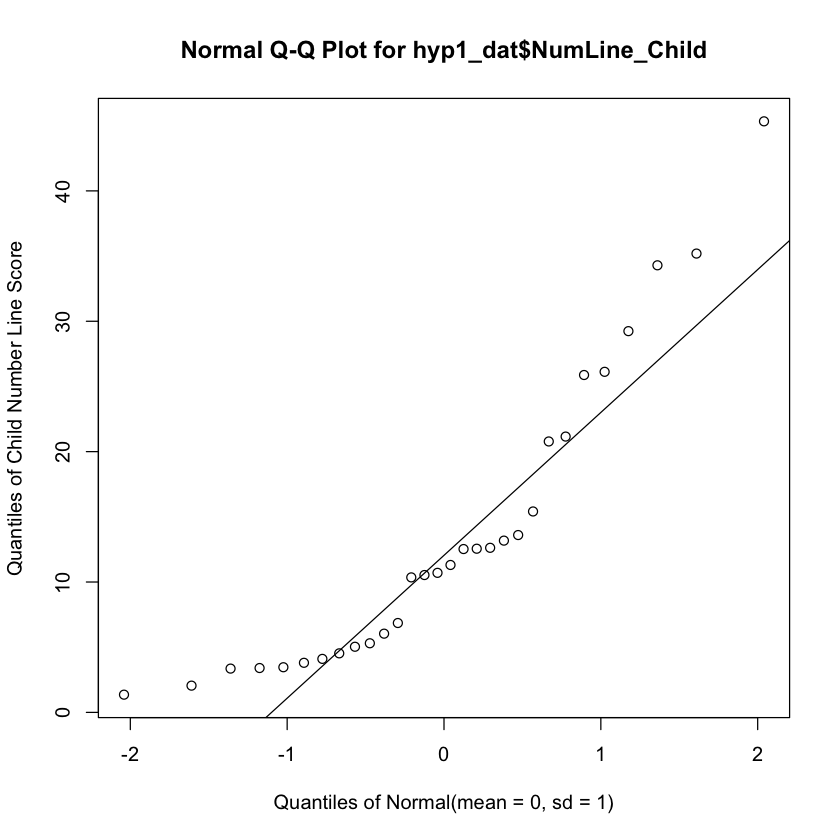

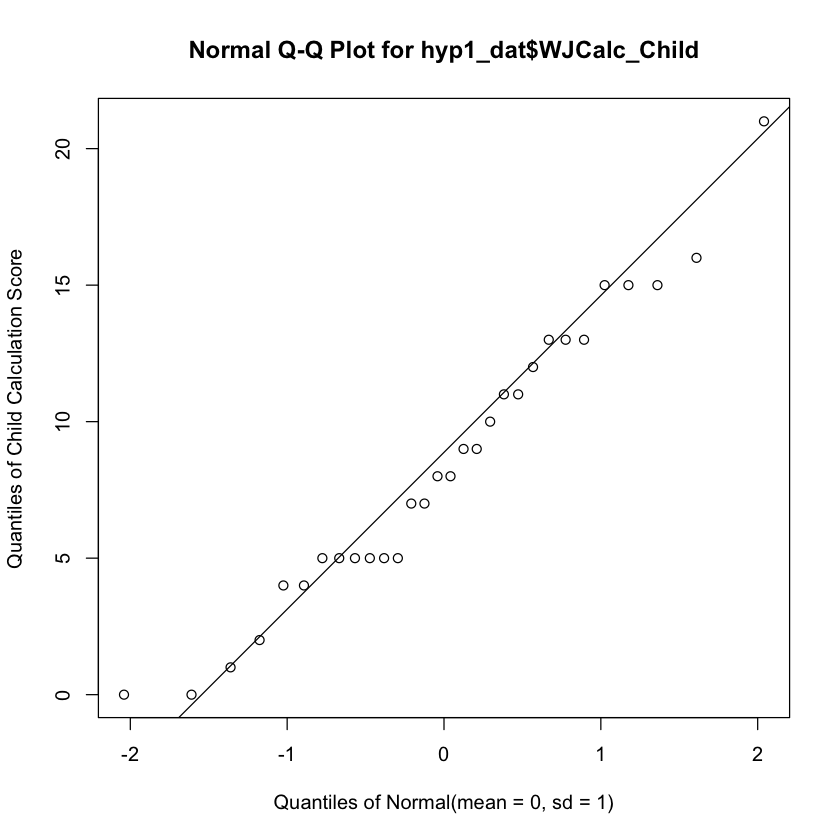

In [5]:
install.packages("EnvStats")
library(EnvStats)

#NumLine_Child
qqPlot(x=hyp1_dat$NumLine_Child, ylab="Quantiles of Child Number Line Score"); qqline(hyp1_dat$NumLine_Child)
    
#WJCalc_Child
qqPlot(x=hyp1_dat$WJCalc_Child, ylab="Quantiles of Child Calculation Score"); qqline(hyp1_dat$WJCalc_Child)

The first plot indicates that our NumLine_Child measure is not normally distributed because the data deviate from the straight line, while the second plot indicates that our WJCalc_Child measure is close to being normally distributed, because the data tend to follow the straight line. For the purposes of this project, I will still operate under the assumption of normality for my number line linear model. I will also conduct bootstrapped accuracy tests of the model estimates to mediate this issue.

2. Perform best subset selection for number line model

In [6]:
install.packages("leaps")
library(leaps)

#Number line
numline_regfit.full = regsubsets(x = NumLine_Child ~ HLE_Child + STAC_Child + Sex_Child + CAI_Child + CorsiBlock_Child + KBIT2.VerbalKnowl_Child + KBIT2.Matrices_Child + Age.Years_Child, data = hyp1_dat)
numline_reg.summary <- summary(numline_regfit.full)
print(numline_reg.summary)


The downloaded binary packages are in
	/var/folders/g5/1rbd_9ns2sb7ccgj9td4k8gm0000gn/T//RtmpWNuf9c/downloaded_packages
Subset selection object
Call: regsubsets.formula(x = NumLine_Child ~ HLE_Child + STAC_Child + 
    Sex_Child + CAI_Child + CorsiBlock_Child + KBIT2.VerbalKnowl_Child + 
    KBIT2.Matrices_Child + Age.Years_Child, data = hyp1_dat)
8 Variables  (and intercept)
                        Forced in Forced out
HLE_Child                   FALSE      FALSE
STAC_Child                  FALSE      FALSE
Sex_Child                   FALSE      FALSE
CAI_Child                   FALSE      FALSE
CorsiBlock_Child            FALSE      FALSE
KBIT2.VerbalKnowl_Child     FALSE      FALSE
KBIT2.Matrices_Child        FALSE      FALSE
Age.Years_Child             FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         HLE_Child STAC_Child Sex_Child CAI_Child CorsiBlock_Child
1  ( 1 ) " "       " "        " "       " "       " "             
2  ( 1 ) " "      

**Plot adjusted $r^2$, Mallow's CP, and BIC values for the best fit model for each level of model complexity.**

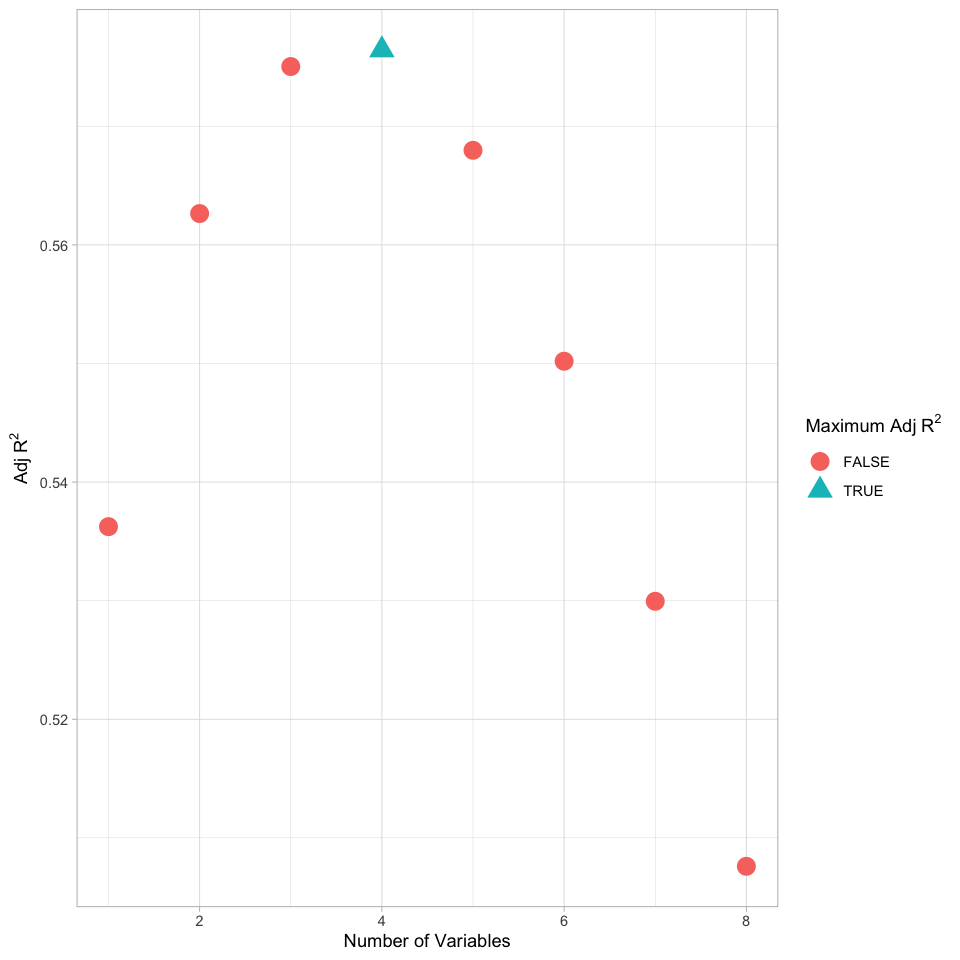

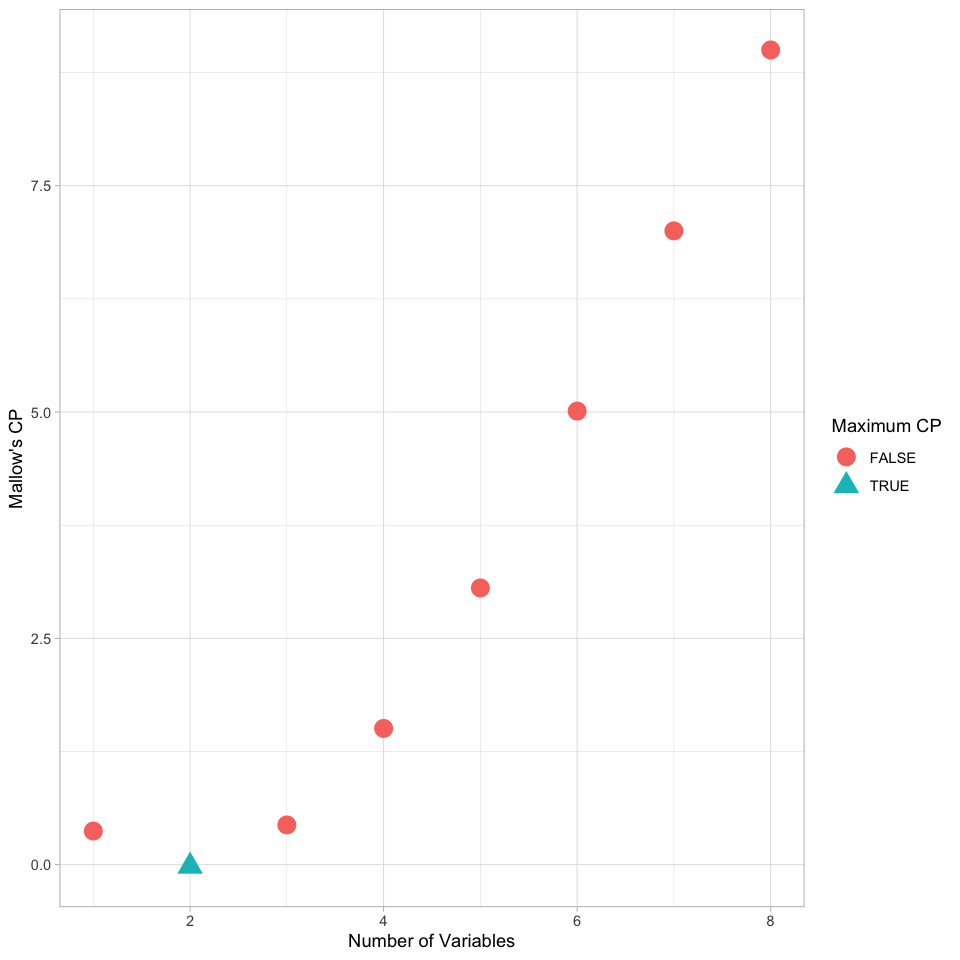

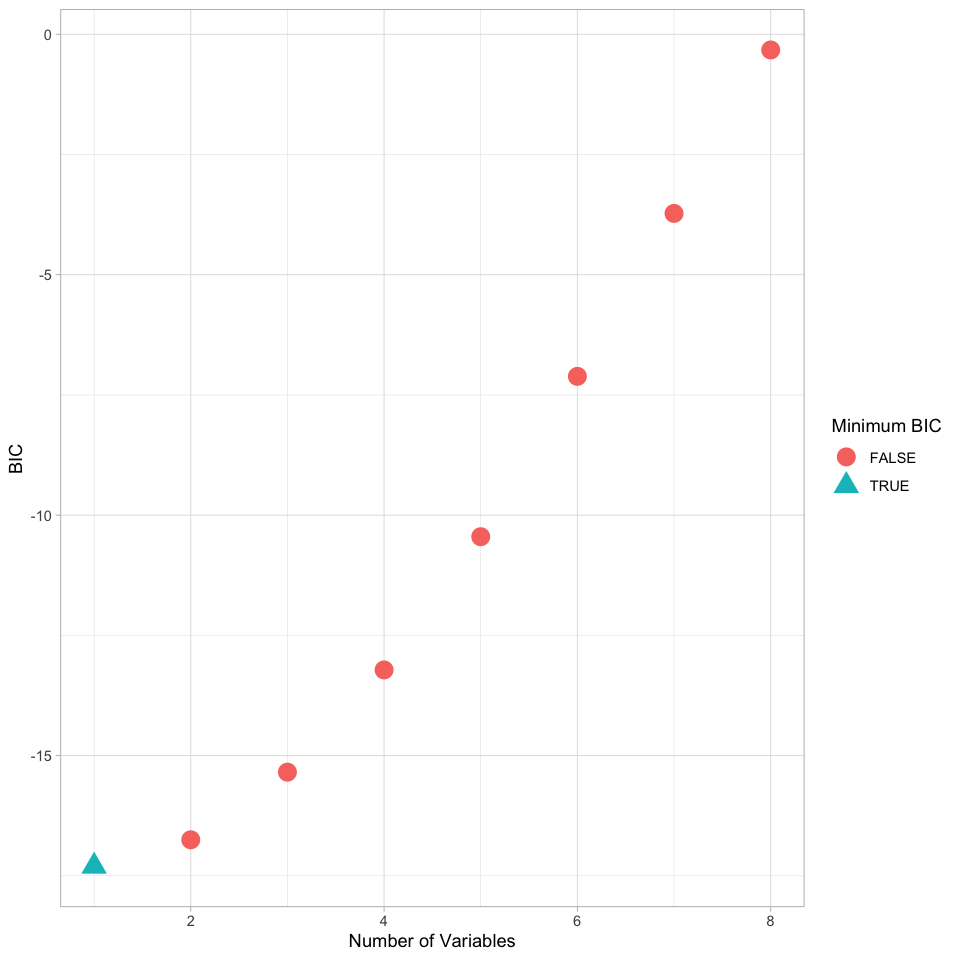

In [65]:
library(tidyverse)

numvar = 1:length(numline_reg.summary$adjr2)
allfalse = rep(FALSE,length(numline_reg.summary$adjr2))

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- numline_reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(numline_reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=5) + 
    theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- numline_reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(numline_reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=5) + 
    theme_light() +
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- numline_reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(numline_reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=5) +
    theme_light() +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")


Interestingly, different models have the highest adjusted $r^2$, lowest Mallow's CP, and lowest BIC. I will choose the 3-feature model as the best fit for my data because it strikes a balance of high adjusted $r^2$ and low Mallow's CP and BIC. The 3-feature model includes child sex, Child Activities Inventory (our measure of gendered behavior), and child age. As to be expected, child age is chosen for every level of model complexity, as it should contribute to a substantial amount of variance in both number line and calculation performance in children.

3. Bootstrap model estimates

In [9]:
#look at model estimates for best fit 3-feature model
numline_lm_1 <- glm(NumLine_Child ~ Sex_Child + CAI_Child + Age.Years_Child, data = hyp1_dat)
summary(numline_lm_1)


Call:
glm(formula = NumLine_Child ~ Sex_Child + CAI_Child + Age.Years_Child, 
    data = hyp1_dat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-12.8113   -5.1930   -0.8375    5.4869   17.2047  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      78.0041    11.6171   6.715 4.00e-07 ***
Sex_Child        -6.1096     4.5696  -1.337   0.1928    
CAI_Child        -0.3209     0.1531  -2.096   0.0459 *  
Age.Years_Child  -6.7439     1.1311  -5.962 2.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 54.37441)

    Null deviance: 3710.6  on 29  degrees of freedom
Residual deviance: 1413.7  on 26  degrees of freedom
AIC: 210.72

Number of Fisher Scoring iterations: 2


The 3-feature model shows that the child's CAI score and their age are significant predictors of their performance on the number line task, while their sex is not. All of these measures relate negatively to number line score, which is desired becuase the lower the number line score, the more accurate the child was on the task. The child age coefficient has the largest absolute value of 6.74, followed by the child's sex with 6.11 and their CAI score with 0.32. It is difficult to interpret the Sex_Child coefficient because it is a categorical variable (with male coded as 0 and female coded as 1), and it is not significant. However, recall from earlier that a higher CAI score indicates more masculine behavior -- therefore, children with more masculine behavior performed better on the number line task.

    (Intercept)       Sex_Child       CAI_Child Age.Years_Child 
     78.0041403      -6.1095692      -0.3209194      -6.7439077 

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = hyp1_dat, statistic = numline_boot, R = 1000)


Bootstrap Statistics :
      original       bias    std. error
t1* 78.0041403 -0.289933419  12.8970660
t2* -6.1095692 -0.472315177   3.7811139
t3* -0.3209194 -0.006974159   0.1340645
t4* -6.7439077  0.119944572   1.3192597


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"

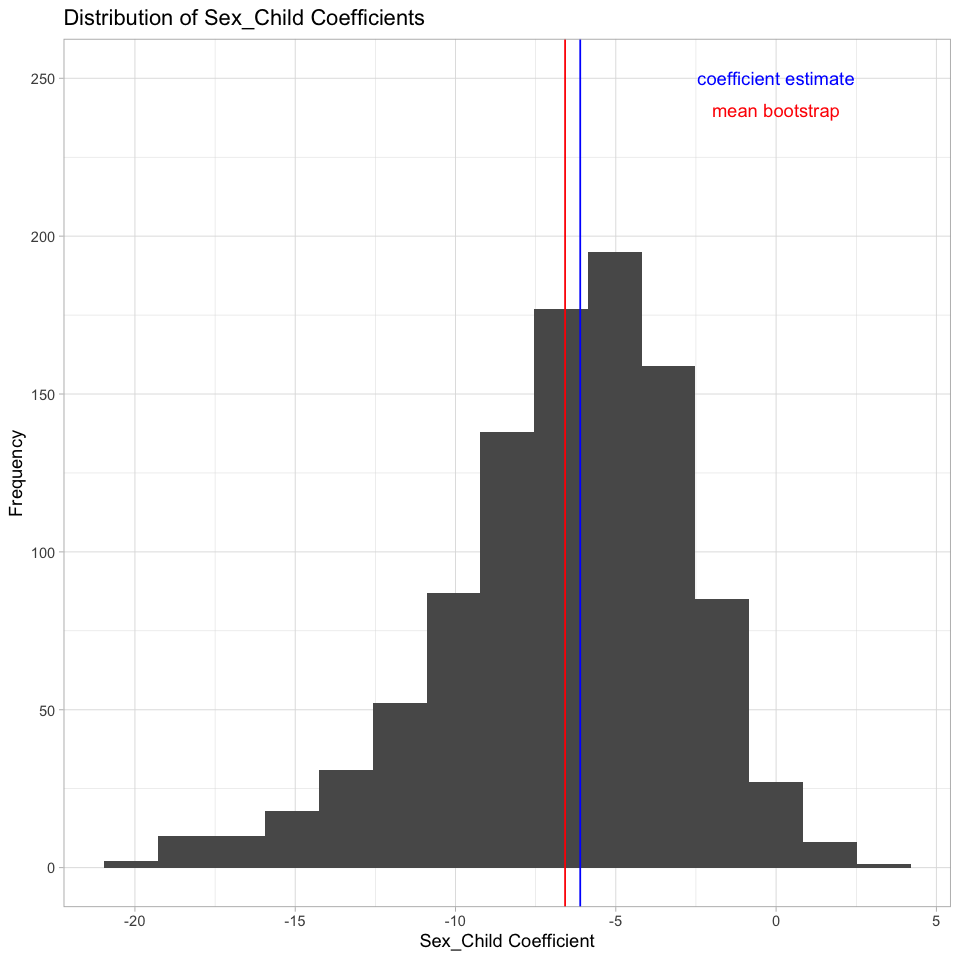

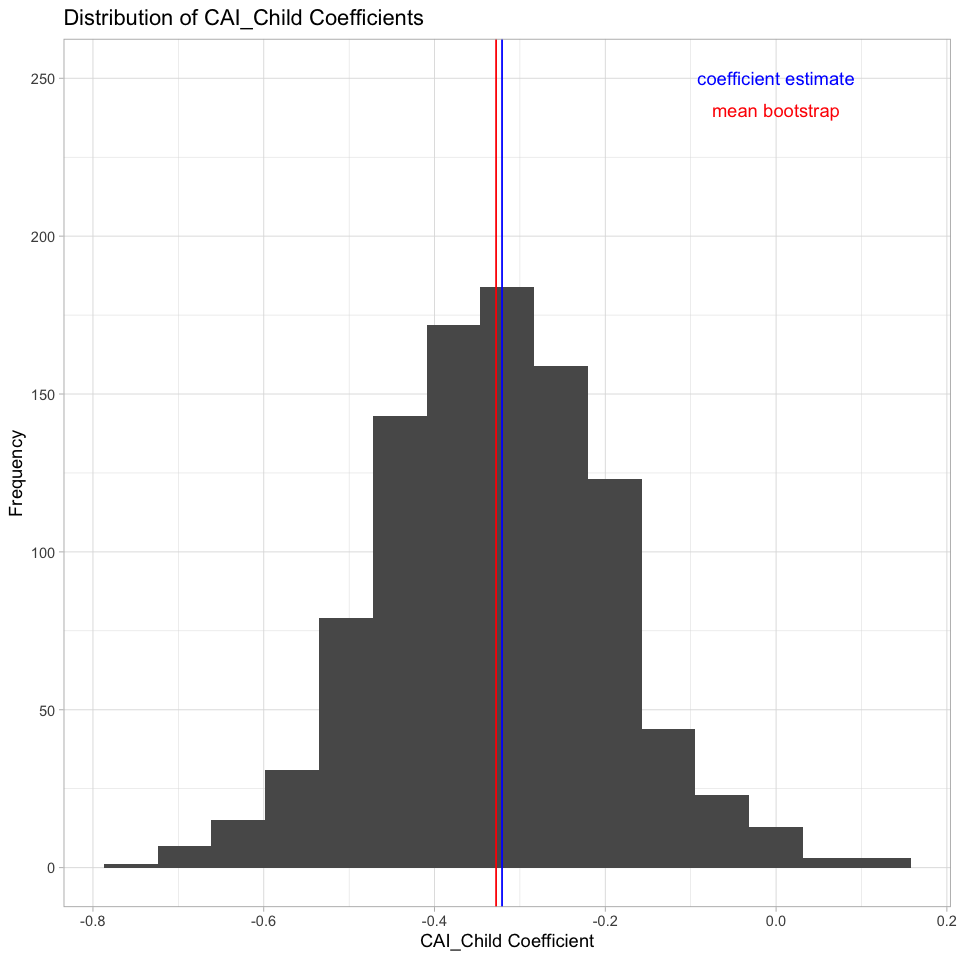

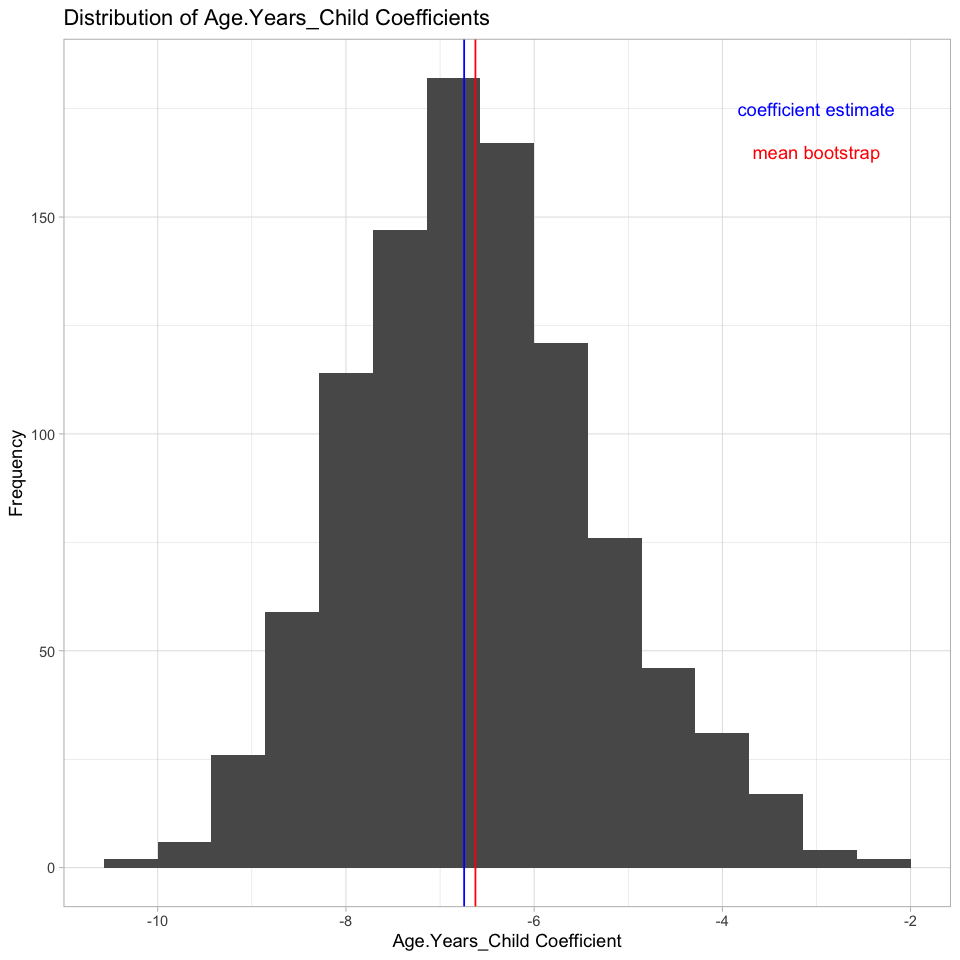

In [66]:
library(boot)
set.seed(2023)

#define boot function
numline_boot <- function(data, index){  
    return(coef(lm(NumLine_Child ~ Sex_Child + CAI_Child + Age.Years_Child, data=data, subset=index)))}

#sanity check (output should fit full model)
print(numline_boot(hyp1_dat, 1:30))

#bootstrap
numline_boot_obj = boot(hyp1_dat, numline_boot, R=1000)
print(numline_boot_obj)
attributes(numline_boot_obj)

bootstrap_df <- data.frame(sex_coef = numline_boot_obj$t[,2], CAI_coef = numline_boot_obj$t[,3], age_coef = numline_boot_obj$t[,4])

#Sex_Child coefficients
ggplot(bootstrap_df, aes(x=sex_coef)) +
    geom_histogram(bins = 15) +
    theme_light() +
    geom_vline(xintercept=numline_lm_1$coefficients[2], color="blue") +
    annotate("text", x= 0, y=250, label= "coefficient estimate", color="blue") +
    geom_vline(xintercept=mean(bootstrap_df$sex_coef), color="red") +
    annotate("text", x= 0, y=240, label= "mean bootstrap", color="red") +
    labs(title = "Distribution of Sex_Child Coefficients", x="Sex_Child Coefficient", y="Frequency")

#CAI coefficients
ggplot(bootstrap_df, aes(x=CAI_coef)) +
    geom_histogram(bins = 15) +
    theme_light() +
    geom_vline(xintercept=numline_lm_1$coefficients[3], color="blue") +
    annotate("text", x=0, y=250, label= "coefficient estimate", color="blue") +
    geom_vline(xintercept=mean(bootstrap_df$CAI_coef), color="red") +
    annotate("text", x= 0, y=240, label= "mean bootstrap", color="red") +
    labs(title = "Distribution of CAI_Child Coefficients", x="CAI_Child Coefficient", y="Frequency")

#Age.Years_Child coefficients
ggplot(bootstrap_df, aes(age_coef)) +
    geom_histogram(bins = 15) +
    theme_light() +
    geom_vline(xintercept=numline_lm_1$coefficients[4], color="blue") +
    annotate("text", x=-3, y=175, label= "coefficient estimate", color="blue") +
    geom_vline(xintercept=mean(bootstrap_df$age_coef), color="red") +
    annotate("text", x=-3, y=165, label= "mean bootstrap", color="red") +
    labs(title = "Distribution of Age.Years_Child Coefficients", x="Age.Years_Child Coefficient", y="Frequency")

options(repr.plot.width=8, repr.plot.height=8)


**Calculate bootstrapped coefficient confidence intervals:**

In [16]:
#Sex_Child
boot.ci(boot.out = numline_boot_obj, type = "norm", index = 2)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = numline_boot_obj, type = "norm", index = 2)

Intervals : 
Level      Normal        
95%   (-13.048,   1.774 )  
Calculations and Intervals on Original Scale

In [17]:
#CAI_Child
boot.ci(boot.out = numline_boot_obj, type = "norm", index = 3)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = numline_boot_obj, type = "norm", index = 3)

Intervals : 
Level      Normal        
95%   (-0.5767, -0.0512 )  
Calculations and Intervals on Original Scale

In [19]:
#Age.Years_Child
boot.ci(boot.out = numline_boot_obj, type = "norm", index = 4)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = numline_boot_obj, type = "norm", index = 4)

Intervals : 
Level      Normal        
95%   (-9.450, -4.278 )  
Calculations and Intervals on Original Scale

The coefficient estimates for Sex_Child, CAI_Child, and Age.Years_Child all lie close to the mean of their bootstrapped distributions, showing that the linear model coefficient estimates are robust. This is especially important because the number line variable is not normally distributed and does not meet the assumptions of a linear model. However, as the number line model output shows, the coefficient for Sex_Child is not significant. This is confirmed by our bootstrap because the expectation of the null ($β_{sex} = 0$) lies within the bootstrapped confidence interval for this predictor [-13.048, 1.774].

4. Perform best subset selection for calculation model

In [20]:
#Calculation
calc_regfit.full = regsubsets(x = WJCalc_Child ~ HLE_Child + STAC_Child + Sex_Child + CAI_Child + CorsiBlock_Child + KBIT2.VerbalKnowl_Child + KBIT2.Matrices_Child + Age.Years_Child, data = hyp1_dat)
calc_reg.summary <- summary(calc_regfit.full)
print(calc_reg.summary)

Subset selection object
Call: regsubsets.formula(x = WJCalc_Child ~ HLE_Child + STAC_Child + 
    Sex_Child + CAI_Child + CorsiBlock_Child + KBIT2.VerbalKnowl_Child + 
    KBIT2.Matrices_Child + Age.Years_Child, data = hyp1_dat)
8 Variables  (and intercept)
                        Forced in Forced out
HLE_Child                   FALSE      FALSE
STAC_Child                  FALSE      FALSE
Sex_Child                   FALSE      FALSE
CAI_Child                   FALSE      FALSE
CorsiBlock_Child            FALSE      FALSE
KBIT2.VerbalKnowl_Child     FALSE      FALSE
KBIT2.Matrices_Child        FALSE      FALSE
Age.Years_Child             FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         HLE_Child STAC_Child Sex_Child CAI_Child CorsiBlock_Child
1  ( 1 ) " "       " "        " "       " "       " "             
2  ( 1 ) " "       " "        " "       " "       "*"             
3  ( 1 ) " "       " "        " "       " "       "*"             
4  ( 1

Plot adjusted $r^2$, Mallow's CP, and BIC values for the best fit model for each level of model complexity.

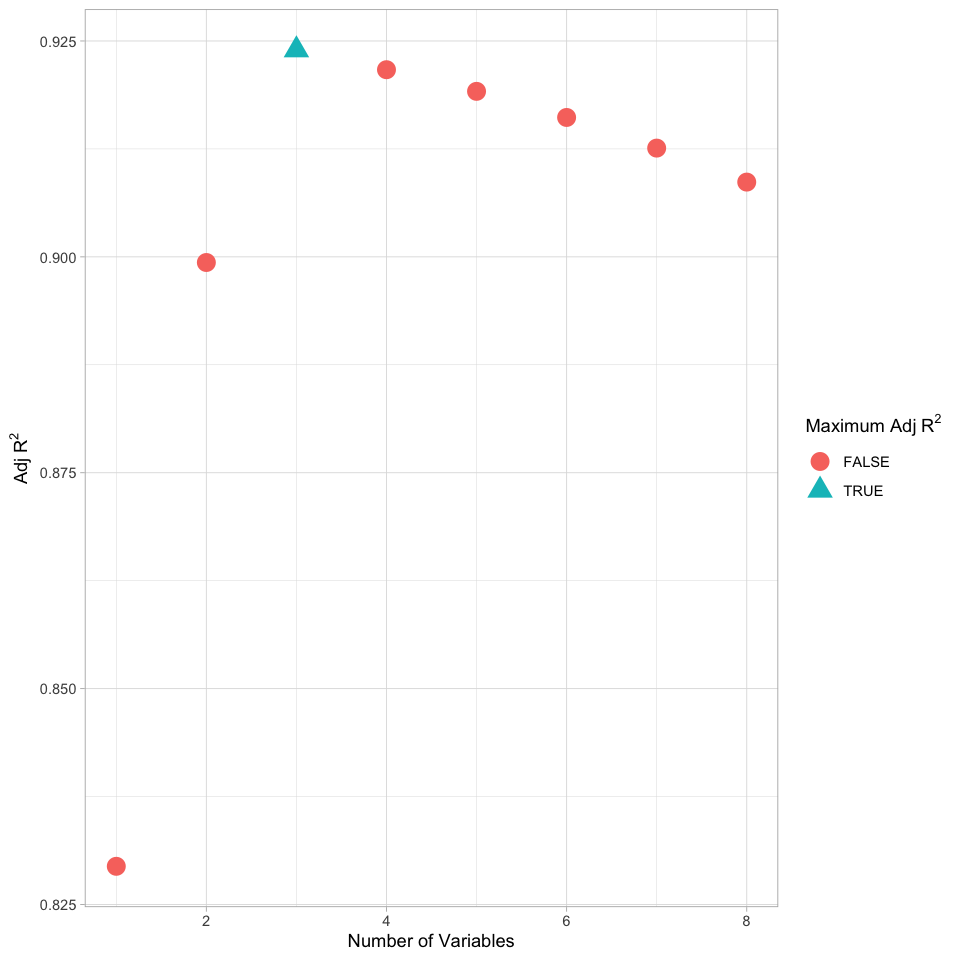

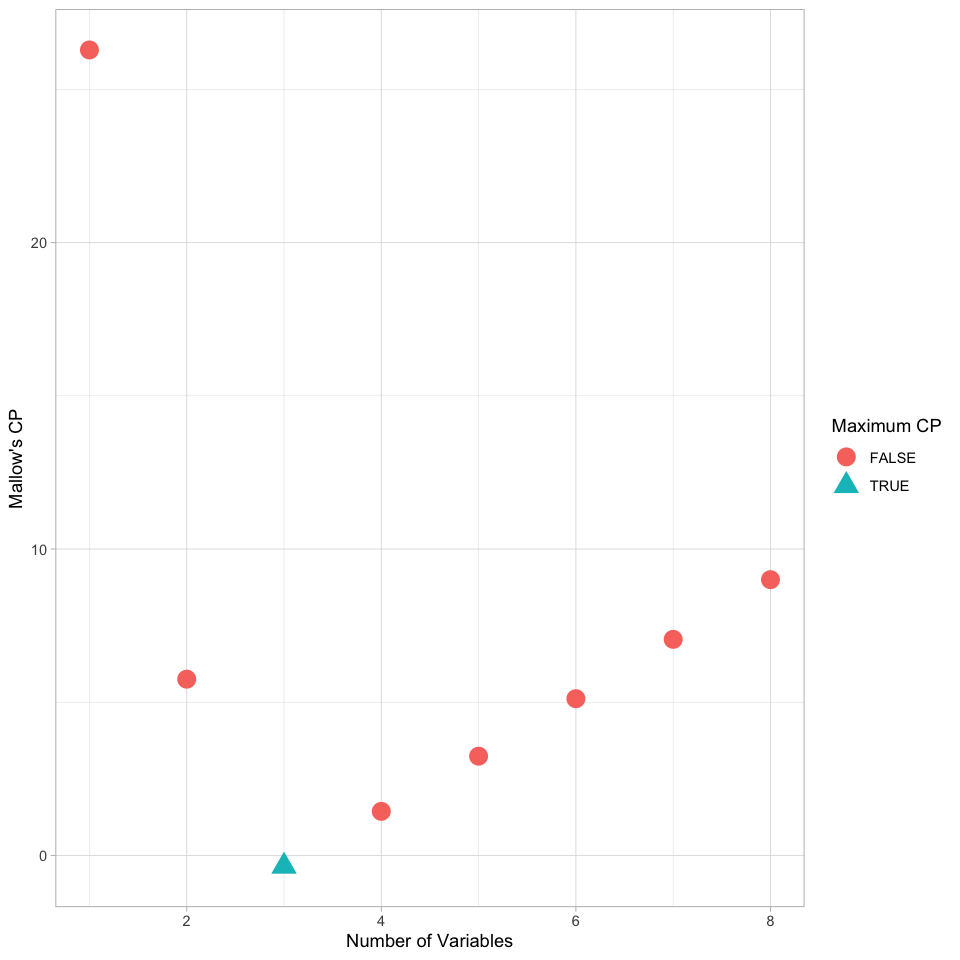

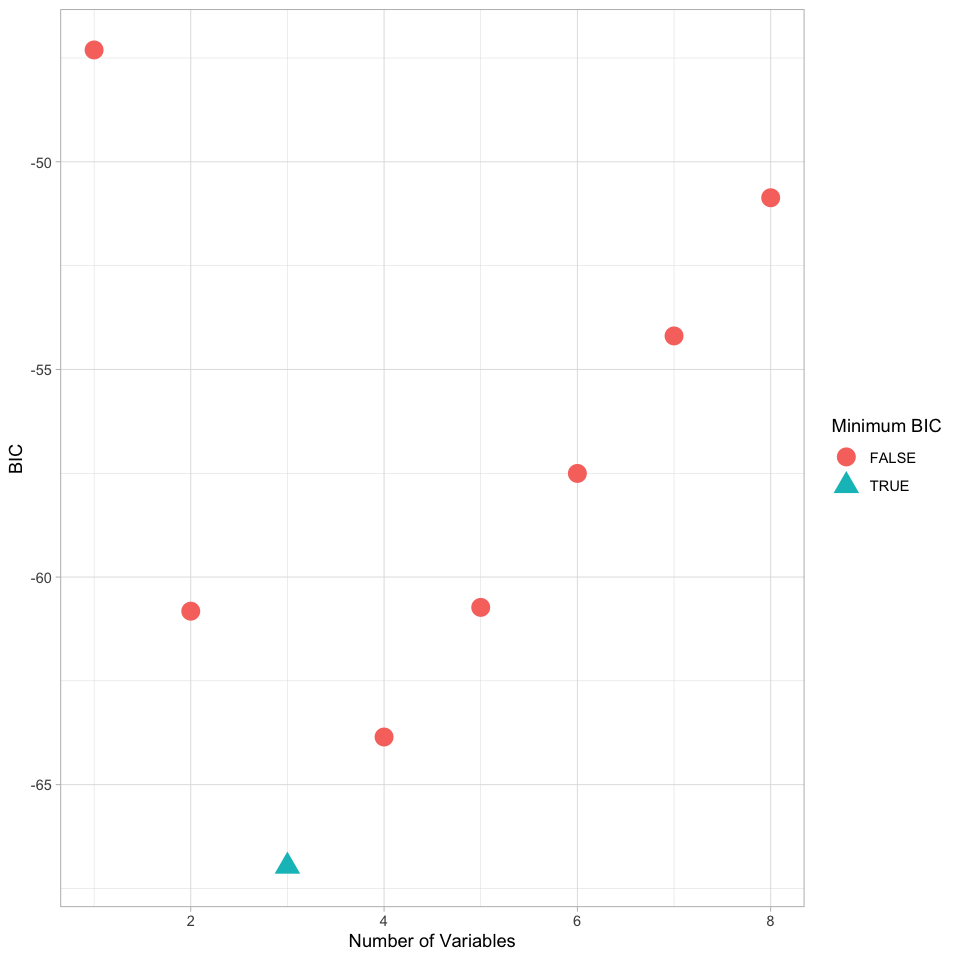

In [67]:
numvar = 1:length(calc_reg.summary$adjr2)
allfalse = rep(FALSE,length(calc_reg.summary$adjr2))

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- calc_reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(calc_reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=5) + 
    theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- calc_reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(calc_reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=5) + 
    theme_light() +
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- calc_reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(calc_reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=5) +
    theme_light() +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

For the calculation linear model, the 3-feature model has the highest adjusted $r^2$, lowest Mallow's CP, and lowest BIC. It contains the child's corsi block score, matrices score, and age. Just as in the number line model, child age is chosen for every level of model complexity as it contributes to a substantial amount of variance in Y.

5. Bootstrap model estimates

In [22]:
#look at model estimates for best fit 3-feature model
calc_lm_1 <- glm(WJCalc_Child ~ CorsiBlock_Child + KBIT2.Matrices_Child + Age.Years_Child, data = hyp1_dat)
summary(calc_lm_1)


Call:
glm(formula = WJCalc_Child ~ CorsiBlock_Child + KBIT2.Matrices_Child + 
    Age.Years_Child, data = hyp1_dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9406  -1.1004  -0.0735   0.7803   3.2518  

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -21.55880    1.65880 -12.997 7.01e-13 ***
CorsiBlock_Child       1.97307    0.37451   5.268 1.66e-05 ***
KBIT2.Matrices_Child   0.16254    0.05208   3.121  0.00438 ** 
Age.Years_Child        2.85828    0.30308   9.431 7.08e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 2.070029)

    Null deviance: 789.467  on 29  degrees of freedom
Residual deviance:  53.821  on 26  degrees of freedom
AIC: 112.67

Number of Fisher Scoring iterations: 2


The 3-feature model shows that corsi block score, matrices score, and child age are all significant predictors of their performance on the calculation task. Child age has the largest coefficient of 2.86, the corsi block coefficient is 1.97, and the matrices coefficient is 0.16, showing that they all have a positive relationship with calculation performance and that age and corsi block contribute to this the most.

         (Intercept)     CorsiBlock_Child KBIT2.Matrices_Child 
         -21.5588024            1.9730689            0.1625406 
     Age.Years_Child 
           2.8582849 

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = hyp1_dat, statistic = calc_boot, R = 1000)


Bootstrap Statistics :
       original       bias    std. error
t1* -21.5588024  0.082039002  2.01759812
t2*   1.9730689 -0.042246545  0.46813285
t3*   0.1625406  0.008693757  0.05401657
t4*   2.8582849 -0.025471844  0.27446254


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"

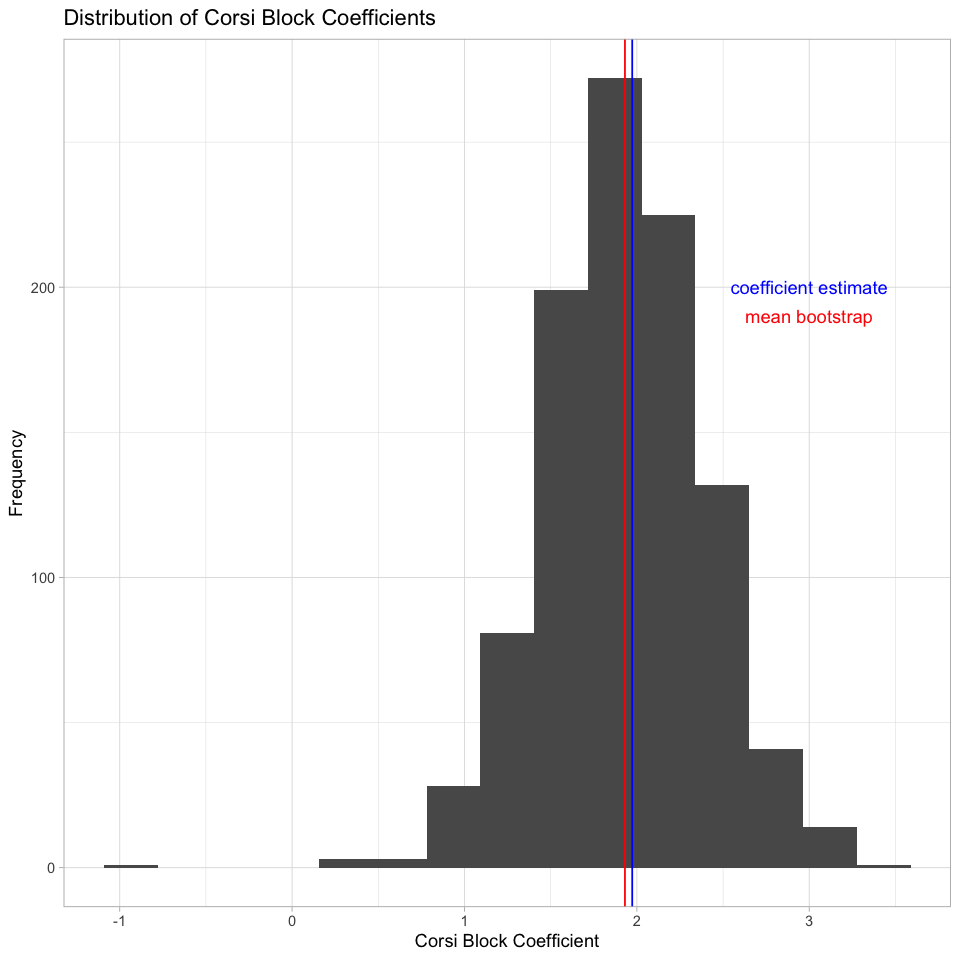

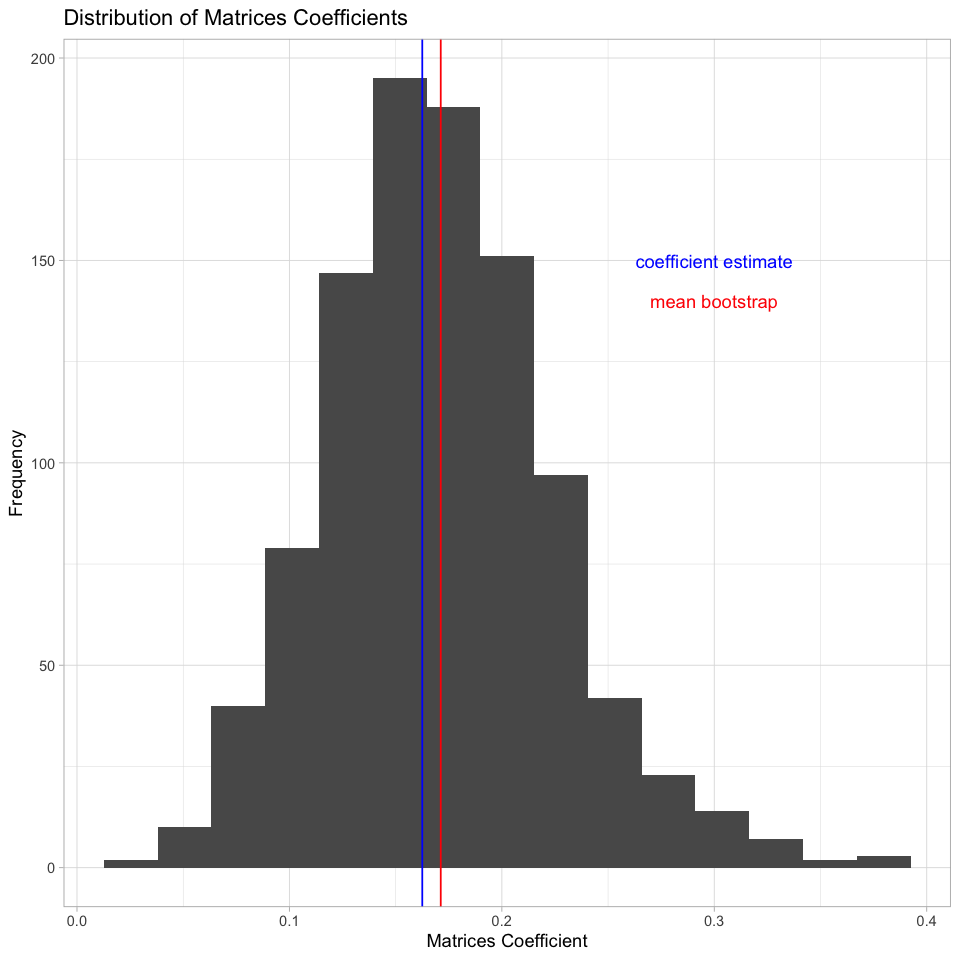

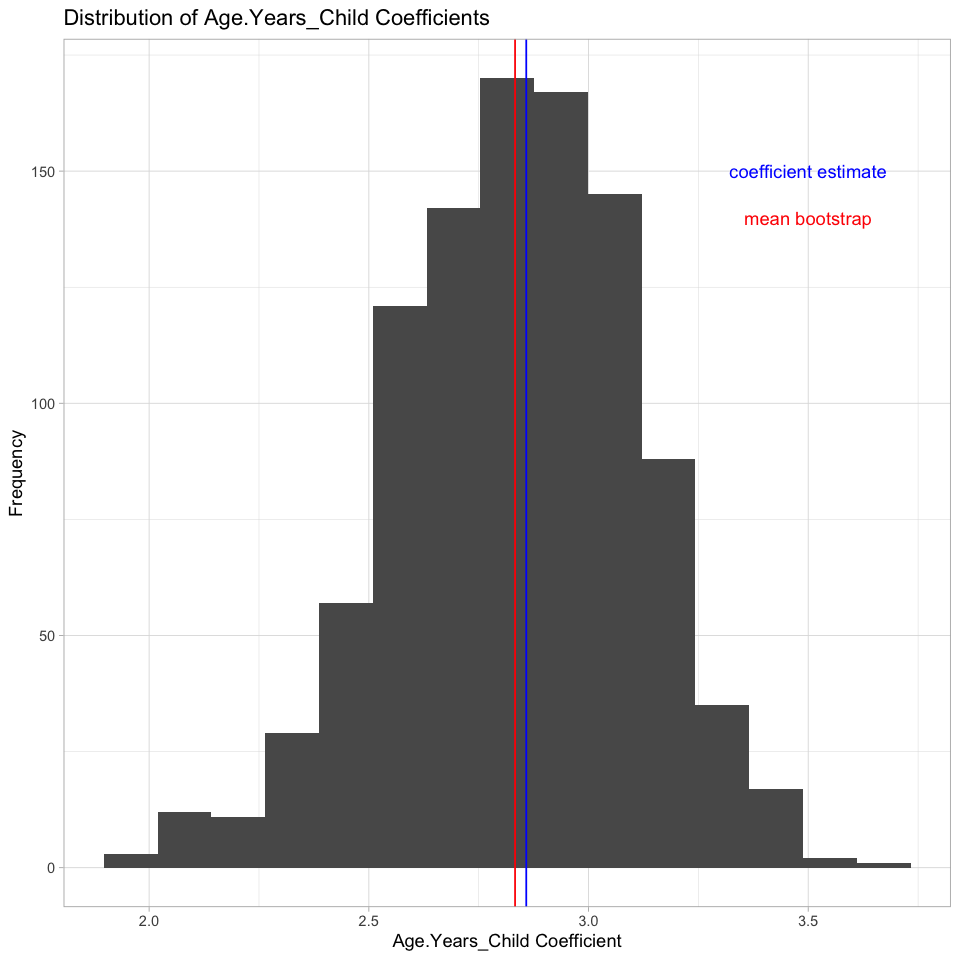

In [68]:
set.seed(2023)

#define boot function
calc_boot <- function(data, index){  
    return(coef(glm(WJCalc_Child ~ CorsiBlock_Child + KBIT2.Matrices_Child + Age.Years_Child, data=data, subset=index)))}

#sanity check (output should match full model)
print(calc_boot(hyp1_dat, 1:31))

#bootstrap for calculation model
calc_boot_obj = boot(hyp1_dat, calc_boot, R=1000)
print(calc_boot_obj)
attributes(calc_boot_obj)

bootstrap_df <- data.frame(corsi_coef = calc_boot_obj$t[,2], matrices_coef = calc_boot_obj$t[,3], age_coef = calc_boot_obj$t[,4])

#CorsiBlock_Child coefficients
ggplot(bootstrap_df, aes(x=corsi_coef)) +
    geom_histogram(bins = 15) +
    theme_light() +
    geom_vline(xintercept=calc_lm_1$coefficients[2], color="blue") +
    annotate("text", x=3, y=200, label= "coefficient estimate", color="blue") +
    geom_vline(xintercept=mean(bootstrap_df$corsi_coef), color="red") +
    annotate("text", x=3, y=190, label= "mean bootstrap", color="red") +
    labs(title = "Distribution of Corsi Block Coefficients", x="Corsi Block Coefficient", y="Frequency")

#KBIT2.Matrices_Child coefficients
ggplot(bootstrap_df, aes(x=matrices_coef)) +
    geom_histogram(bins = 15) +
    theme_light() +
    geom_vline(xintercept=calc_lm_1$coefficients[3], color="blue") +
    annotate("text", x=0.3, y=150, label= "coefficient estimate", color="blue") +
    geom_vline(xintercept=mean(bootstrap_df$matrices_coef), color="red") +
    annotate("text", x=0.3, y=140, label= "mean bootstrap", color="red") +
    labs(title = "Distribution of Matrices Coefficients", x="Matrices Coefficient", y="Frequency")

#Age.Years_Child coefficients
ggplot(bootstrap_df, aes(age_coef)) +
    geom_histogram(bins = 15) +
    theme_light() +
    geom_vline(xintercept=calc_lm_1$coefficients[4], color="blue") +
    annotate("text", x=3.5, y=150, label= "coefficient estimate", color="blue") +
    geom_vline(xintercept=mean(bootstrap_df$age_coef), color="red") +
    annotate("text", x=3.5, y=140, label= "mean bootstrap", color="red") +
    labs(title = "Distribution of Age.Years_Child Coefficients", x="Age.Years_Child Coefficient", y="Frequency")

**Calculate bootstrapped coefficient confidence intervals:**

In [24]:
#CorsiBlock_Child
boot.ci(boot.out = calc_boot_obj, type = "norm", index = 2)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = calc_boot_obj, type = "norm", index = 2)

Intervals : 
Level      Normal        
95%   ( 1.098,  2.933 )  
Calculations and Intervals on Original Scale

In [25]:
#KBIT2.Matrices_Child
boot.ci(boot.out = calc_boot_obj, type = "norm", index = 3)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = calc_boot_obj, type = "norm", index = 3)

Intervals : 
Level      Normal        
95%   ( 0.0480,  0.2597 )  
Calculations and Intervals on Original Scale

In [26]:
#Age.Years_Child
boot.ci(boot.out = calc_boot_obj, type = "norm", index = 4)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = calc_boot_obj, type = "norm", index = 4)

Intervals : 
Level      Normal        
95%   ( 2.346,  3.422 )  
Calculations and Intervals on Original Scale

The coefficient estimates for CorsiBlock_Child, KBIT2.Matrices_Child, and Age.Years_Child all lie close to the mean of their bootstrapped distributions, showing that the linear model coefficient estimates are robust. Additionally, the null is rejected for all coefficient estimates because none of their confidence intervals contain 0.

### Hypothesis 2: Parents’ math and spatial performance is predictive of their children’s math and spatial performance when controlling for age, and potentially mediated by the child’s spatial experience.



#### Steps:
1. Run number line and calculation linear models
2. Conduct 4-fold cross validation on each model
3. Calculate bootstrapped accuracy of model estimates
4. Run exploratory mediation analysis

1. Linear Models

In [27]:
#number line
numline_lm_2 <- glm(NumLine_Child ~ NumLine_Parent + Age.Years_Child, data = hyp2_dat)
summary(numline_lm_2)

#calculation
calc_lm_2 <- glm(WJCalc_Child ~ WJCalc_Parent + Age.Years_Child, data = hyp2_dat)
summary(calc_lm_2)


Call:
glm(formula = NumLine_Child ~ NumLine_Parent + Age.Years_Child, 
    data = hyp2_dat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-12.4596   -4.1185   -0.6628    3.6325   18.8267  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      62.3393     8.0474   7.747 1.94e-08 ***
NumLine_Parent   -0.4196     1.0946  -0.383    0.704    
Age.Years_Child  -6.9498     1.1181  -6.216 1.03e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 56.79032)

    Null deviance: 3845.6  on 30  degrees of freedom
Residual deviance: 1590.1  on 28  degrees of freedom
AIC: 218.04

Number of Fisher Scoring iterations: 2



Call:
glm(formula = WJCalc_Child ~ WJCalc_Parent + Age.Years_Child, 
    data = hyp2_dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5372  -1.5114   0.0968   1.1177   6.1167  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -19.93487    3.02526  -6.589 3.80e-07 ***
WJCalc_Parent     0.07850    0.06312   1.244    0.224    
Age.Years_Child   3.80040    0.32112  11.835 2.06e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 4.724074)

    Null deviance: 795.94  on 30  degrees of freedom
Residual deviance: 132.27  on 28  degrees of freedom
AIC: 140.95

Number of Fisher Scoring iterations: 2


The models reveal that parents' number line estimation scores do not predict childrens' number line estimation scores, nor do parents' calculation skills predict their childrens' calculation scores. As to be expected, child age is a significant predictor of their number line and calculation scores.

2. 4-fold Cross Validation

In [17]:
numline_cv.err <- cv.glm(hyp2_dat, numline_lm_2, K=4)
numline_cv.err$delta 

[1] 75.06604 71.67005

In [58]:
calc_cv.err <- cv.glm(hyp2_dat, calc_lm_2, K=4)
calc_cv.err$delta

[1] 4.999776 4.895404

Both models have relatively high prediction errors, with the number line model having a particularly high error of 75.066 and the calculation model having an error of 5.000. This is not surprising, as each model only has 2 features and we know that one of the features (parent number line/calculation score) is not a significant predictor of child performance.

3. Bootstrapping

    (Intercept)  NumLine_Parent Age.Years_Child 
      62.339347       -0.419560       -6.949774 
    (Intercept)   WJCalc_Parent Age.Years_Child 
   -19.93486731      0.07850159      3.80040418 

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = hyp2_dat, statistic = numline_boot, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 62.339347 -0.03795285    9.884662
t2* -0.419560 -0.07595212    1.102469
t3* -6.949774  0.01135579    1.124797


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = hyp2_dat, statistic = calc_boot, R = 1000)


Bootstrap Statistics :
        original       bias    std. error
t1* -19.93486731 -0.331079873  3.37328731
t2*   0.07850159  0.003086739  0.06333221
t3*   3.80040418  0.037508973  0.38993027


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"

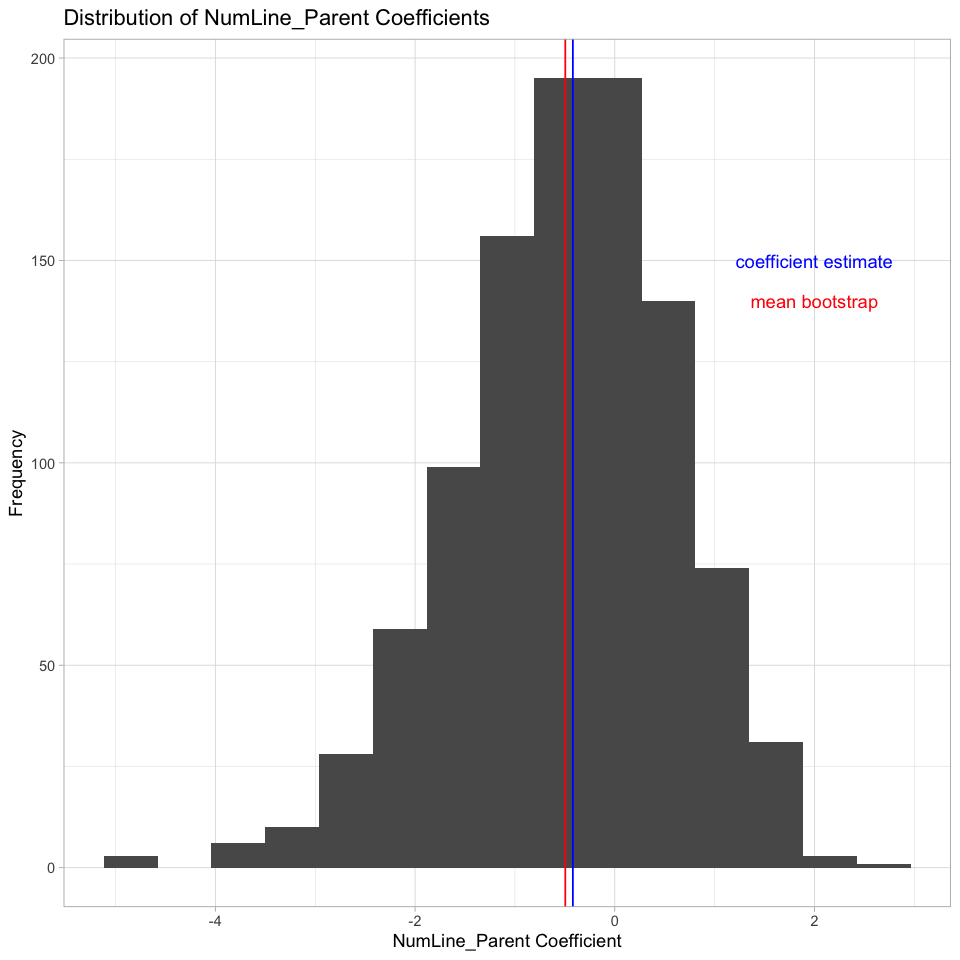

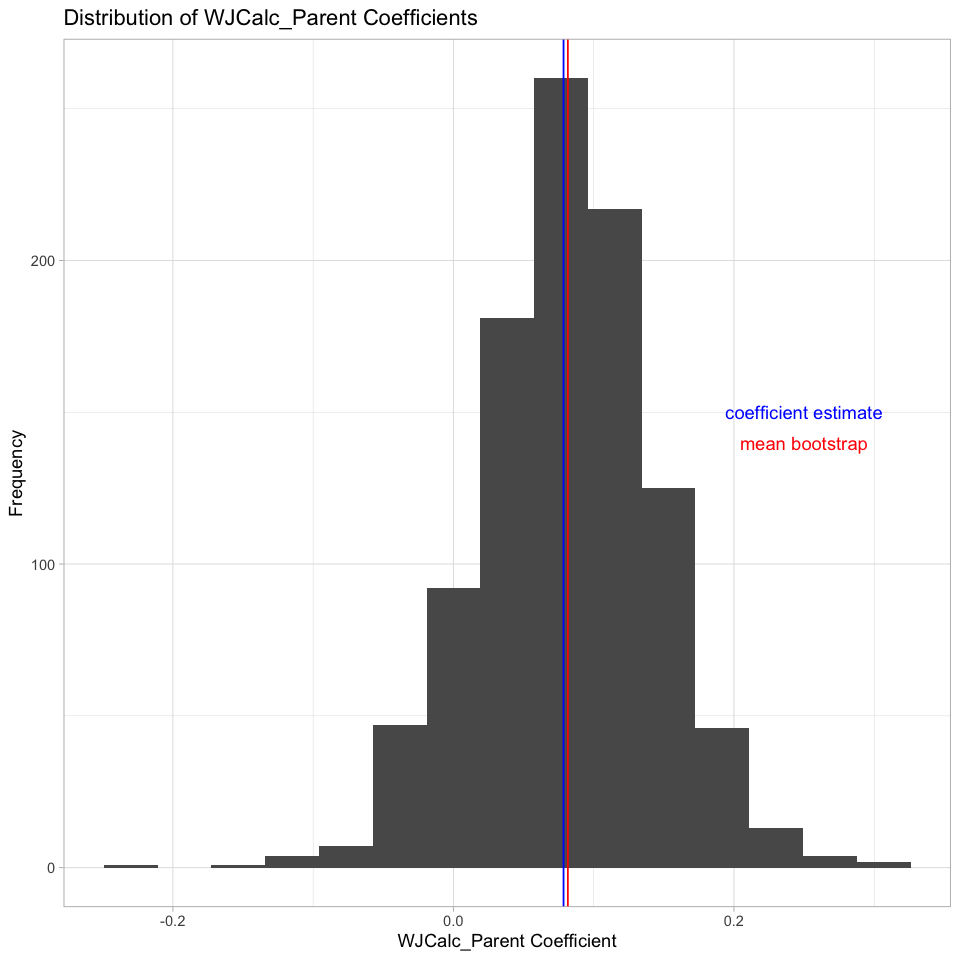

In [69]:
#define number line boot function
numline_boot <- function(data, index){  
    return(coef(glm(NumLine_Child ~ NumLine_Parent + Age.Years_Child, data=data, subset=index)))}

#define calculation boot function
calc_boot <- function(data, index){  
    return(coef(glm(WJCalc_Child ~ WJCalc_Parent + Age.Years_Child, data=data, subset=index)))}

#sanity check (outputs should match full models)
print(numline_boot(hyp2_dat, 1:31))
print(calc_boot(hyp2_dat, 1:31))

#bootstrap for number line model
numline_boot_obj = boot(hyp2_dat, numline_boot, R=1000)
print(numline_boot_obj)
attributes(numline_boot_obj)

bootstrap_df <- data.frame(numlineparent_coef = numline_boot_obj$t[,2])

ggplot(bootstrap_df, aes(x=numlineparent_coef)) +
    geom_histogram(bins = 15) +
    theme_light() +
    geom_vline(xintercept=numline_lm_2$coefficients[2], color="blue") +
    annotate("text", x=2, y=150, label= "coefficient estimate", color="blue") +
    geom_vline(xintercept=mean(bootstrap_df$numlineparent_coef), color="red") +
    annotate("text", x=2, y=140, label= "mean bootstrap", color="red") +
    labs(title = "Distribution of NumLine_Parent Coefficients", x="NumLine_Parent Coefficient", y="Frequency")

#bootstrap for calculation model
calc_boot_obj = boot(hyp2_dat, calc_boot, R=1000)
print(calc_boot_obj)
attributes(calc_boot_obj)

bootstrap_df <- mutate(bootstrap_df, calcparent_coef=calc_boot_obj$t[,2])

ggplot(bootstrap_df, aes(x=calcparent_coef)) +
    geom_histogram(bins = 15) +
    theme_light() +
    geom_vline(xintercept=calc_lm_2$coefficients[2], color="blue") +
    annotate("text", x=0.25, y=150, label= "coefficient estimate", color="blue") +
    geom_vline(xintercept=mean(bootstrap_df$calcparent_coef), color="red") +
    annotate("text", x=0.25, y=140, label= "mean bootstrap", color="red") +
    labs(title = "Distribution of WJCalc_Parent Coefficients", x="WJCalc_Parent Coefficient", y="Frequency")


**Calculate bootstrapped coefficient confidence intervals:**

In [32]:
#NumLine_Parent
boot.ci(boot.out = numline_boot_obj, type = "norm", index = 2)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = numline_boot_obj, type = "norm", index = 2)

Intervals : 
Level      Normal        
95%   (-2.5452,  1.8616 )  
Calculations and Intervals on Original Scale

In [33]:
#WJCalc_Parent
boot.ci(boot.out = calc_boot_obj, type = "norm", index = 2)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = calc_boot_obj, type = "norm", index = 2)

Intervals : 
Level      Normal        
95%   (-0.0502,  0.2003 )  
Calculations and Intervals on Original Scale

The coefficient estimates for both parent number line score and parent calculation score lie close to the mean of their bootstrapped distributions, showing that the linear model coefficient estimates are robust. Additionally, bootstrapping the coefficient estimates confirms that they are not significant because the null expectation of 0 is present in both distributions, 95% $CI_{numberline}$[-2.5452, 1.8616],  95% $CI_{calc}$[-2.5452,  1.8616].

4. Exploratory Mediation Analysis

**Plot relationships between (1) child spatial experience, child numberline score, and parent numberline score; and (2) child spatial experience, child calculation score, and parent calculation score**

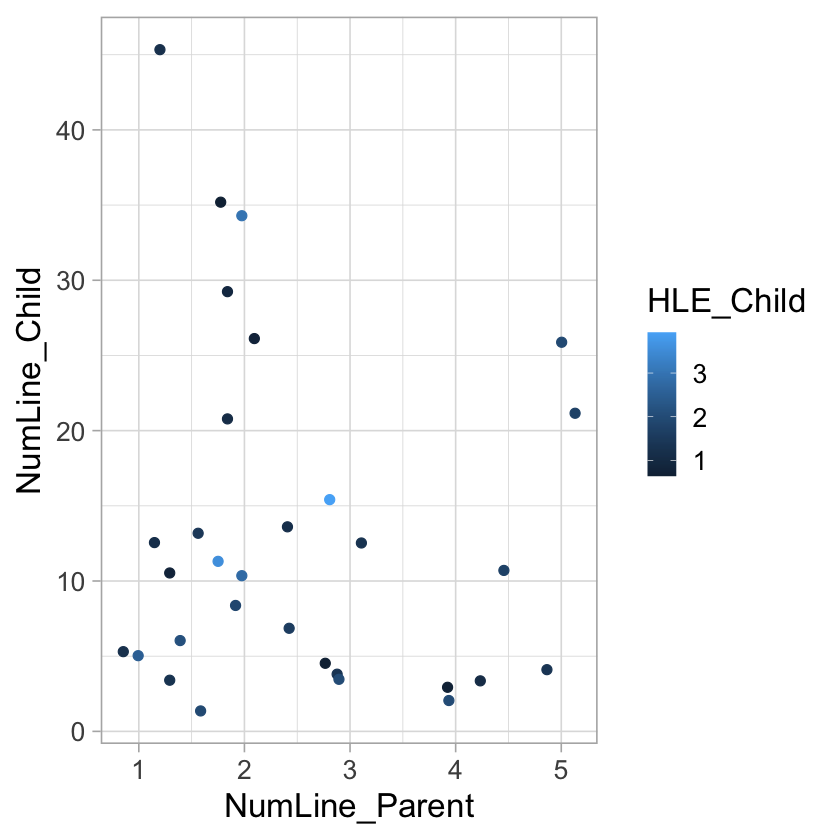

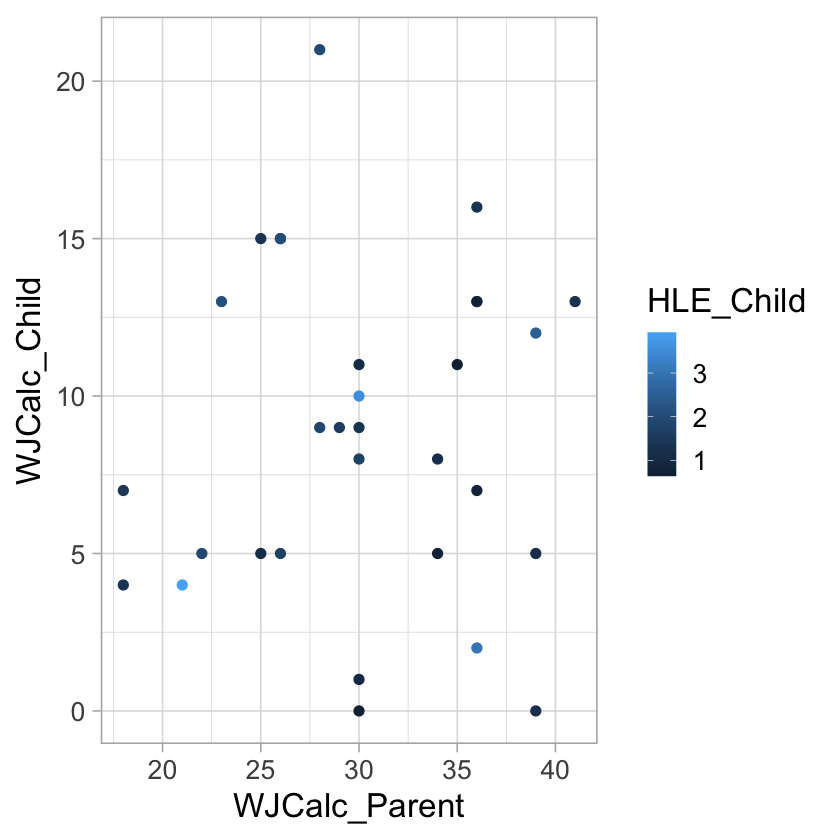

In [8]:
options(warn=-1)

#NumLine plot
ggplot(hyp2_dat, aes(x=NumLine_Parent, y=NumLine_Child, color = HLE_Child)) +
    geom_point(size = 2.5) +
    theme_light(base_size = 20)

#Calc plot
ggplot(hyp2_dat, aes(x=WJCalc_Parent, y=WJCalc_Child, color = HLE_Child)) +
    geom_point(size = 2.5) +
    theme_light(base_size = 20)


Upon visual inspection, there does not seem to be a relationship between parent and child number line and calculation scores. This is consistent with the parent scores not being significant predictors in the linear models. There also does not seem to be a relationship to spatial experience (HLE_Child). I will continue with the exploratory mediation analysis for the purpose of this project, though it is anticipated that I will not find significant results.

Mediation Analyses

In [44]:
library(mediation)

#NumLine analysis
fitM <- lm(HLE_Child ~ NumLine_Parent, data=hyp2_dat) #Step 1: IV on M, parent numberline score predicting child spatial experience
fitY <- lm(NumLine_Child ~ NumLine_Parent + HLE_Child, data=hyp2_dat) #Step 2: IV and M on DV, parent numberline and child spatial experience predicting child numberline score
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="NumLine_Parent", mediator="HLE_Child")
summary(fitMed)

#Calc analysis
fitM <- lm(HLE_Child ~ WJCalc_Parent, data=hyp2_dat) #Step 1: IV on M, parent calculation predicting child spatial experience
fitY <- lm(WJCalc_Child ~ WJCalc_Parent + HLE_Child, data=hyp2_dat) #Step 2: IV and M on DV, parent calculation score and child spatial experience predicting child calculation score
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="WJCalc_Parent", mediator="HLE_Child")
summary(fitMed)


Call:
lm(formula = HLE_Child ~ NumLine_Parent, data = hyp2_dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0019 -0.5264 -0.2497  0.3462  2.2965 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.66658    0.33742   4.939    3e-05 ***
NumLine_Parent -0.01228    0.12108  -0.101     0.92    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8382 on 29 degrees of freedom
Multiple R-squared:  0.0003548,	Adjusted R-squared:  -0.03412 
F-statistic: 0.01029 on 1 and 29 DF,  p-value: 0.9199



Call:
lm(formula = NumLine_Child ~ NumLine_Parent + HLE_Child, data = hyp2_dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.637  -9.052  -2.553   5.388  30.342 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)     17.3078     6.3399   2.730   0.0108 *
NumLine_Parent  -1.1417     1.6769  -0.681   0.5015  
HLE_Child       -0.7787     2.5713  -0.303   0.7642  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.61 on 28 degrees of freedom
Multiple R-squared:  0.01919,	Adjusted R-squared:  -0.05087 
F-statistic: 0.2739 on 2 and 28 DF,  p-value: 0.7625



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value
ACME            0.01997     -0.62591         0.74    0.97
ADE            -1.11935     -4.22344         2.22    0.52
Total Effect   -1.09938     -4.32314         2.31    0.52
Prop. Mediated  0.00502     -1.61811         1.40    0.90

Sample Size Used: 31 


Simulations: 1000 



Call:
lm(formula = HLE_Child ~ WJCalc_Parent, data = hyp2_dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9986 -0.5975 -0.1717  0.2377  2.0317 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    2.49296    0.73158   3.408  0.00194 **
WJCalc_Parent -0.02838    0.02374  -1.196  0.24144   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8184 on 29 degrees of freedom
Multiple R-squared:  0.04699,	Adjusted R-squared:  0.01413 
F-statistic:  1.43 on 1 and 29 DF,  p-value: 0.2414



Call:
lm(formula = WJCalc_Child ~ WJCalc_Parent + HLE_Child, data = hyp2_dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9667 -3.4966 -0.2495  3.4479 12.1668 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)    5.55144    5.59044   0.993    0.329
WJCalc_Parent  0.06312    0.15700   0.402    0.691
HLE_Child      0.78520    1.19910   0.655    0.518

Residual standard error: 5.285 on 28 degrees of freedom
Multiple R-squared:  0.01754,	Adjusted R-squared:  -0.05264 
F-statistic: 0.2499 on 2 and 28 DF,  p-value: 0.7806



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value
ACME           -0.02173     -0.13580         0.05    0.59
ADE             0.06404     -0.25498         0.35    0.66
Total Effect    0.04230     -0.27343         0.34    0.78
Prop. Mediated -0.00767     -2.90937         2.87    0.95

Sample Size Used: 31 


Simulations: 1000 


The mediation analyses for 1) child spatial experience on parent and child number line scores, and 2) child spatial experience on parent and child calculation scores show no mediating effect in either case. Neither the indirect or direct pathways in both analyses were significant, which was expected given the visualization of these variables and the models conducted.

## Conclusions

The first hypothesis tested here is that children’s math performance is predicted by their gender and prior experience with spatial activities when controlling for spatial working memory, IQ measures, and age. Best subset selection found that a 3-feature model including the child's sex, their Child Activities Inventory score, and their age best explained performance on the number line task. According to the model, higher CAI scores (meaning more masculine behavior) predict better number line performance, which is consistent with previous research showing that boys perform better on the number line task than girls. Interestingly, categorical gender was not a significant predictor of performance even though it was included in the best-fitting 3-feature model. Meanwhile, a 3-feature model including the child's corsi block score, matrices score, and age best explained childrens' performance on the calculation task, suggesting that these skills are more relevant than gender or gendered behavior in calculation performance. The second hypothesis tested was that parents’ math and spatial performance is predictive of their children’s math and spatial performance when controlling for the child’s age, and may potentially be mediated by the child’s spatial experience. Linear models revealed that neither parent number line score nor calculation score predicted child number line/calculation score, and subsequent mediation analyses found no significant mediating effects of spatial experience.

## References

 - Bian, L., Leslie, S. J., & Cimpian, A. (2017). Gender stereotypes about intellectual ability emerge early and influence children’s interests. Science, 355(6323), 389-391.

 - Casey, M. B. (1996). Understanding individual differences in spatial ability within females: A nature/nurture interactionist framework. Developmental Review, 16(3), 241-260.

 - Ganley, C. M., & Vasilyeva, M. (2011). Sex differences in the relation between math performance, spatial skills, and attitudes. Journal of Applied Developmental Psychology, 32(4), 235-242.

 - Golombok, S., Rust, J., Zervoulis, K., Croudace, T., Golding, J., & Hines, M. (2008). Developmental trajectories of sex‐typed behavior in boys and girls: A longitudinal general population study of children aged 2.5–8 years. Child development, 79(5), 1583-1593.

 - Golombok, S., & Rust, J. (1993). The Pre-School Activities Inventory: A standardized assessment of gender role in children. Psychological Assessment, 5(2), 131.

 - Gunderson, E. A., & Hildebrand, L. (2021). Relations among spatial skills, number line estimation, and exact and approximate calculation in young children. Journal of Experimental Child Psychology, 212, 105251.

 - Hutchison, J. E., Lyons, I. M., & Ansari, D. (2019). More similar than different: Gender differences in children's basic numerical skills are the exception not the rule. Child development, 90(1), e66-e79.

 - Lauer, J. E., Yhang, E., & Lourenco, S. F. (2019). The development of gender differences in spatial reasoning: A meta-analytic review. Psychological bulletin, 145(6), 537.

 - Sénéchal, M., LeFevre, J. A., Hudson, E., & Lawson, E. P. (1996). Knowledge of storybooks as a predictor of young children's vocabulary. Journal of Educational Psychology, 88(3), 520.

 - Verdine, B. N., Zimmermann, L., Foster, L., Marzouk, M. A., Golinkoff, R. M., Hirsh-Pasek, K., & Newcombe, N. (2019). Effects of geometric toy design on parent–child interactions and spatial language. Early childhood research quarterly, 46, 126-141.

 - Zippert, E. L., & Rittle-Johnson, B. (2020). The home math environment: More than numeracy. Early Childhood Research Quarterly, 50, 4-15.